In [1]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
import numpy as np
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
#from AtlasCommonUtils import SetAtlasStyle
#from Legend import Legend
from ROOT import TLatex
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);


Welcome to JupyROOT 6.16/00


# Data and MC files

In [23]:
#Datafile = ROOT.TFile('/home/dhruv/13def_4L_16_10GeV30GeV_yesnoISO.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_4L_w2Dplots_noPhos_200Kevents_zv.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_200Kevents_ISOeff.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_100Kevents_phosDCAlgap_erwanbinning_new.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_100Kevents_wTOFCut_phosDCAlgap_1GeVbinning_new.root')
MCfile = ROOT.TFile('/home/dhruv/17g6a1_5GeV60GeV_100Kevents_noNLMCut_phosDCAlgap_1GeVbinning_new.root')



#MCfile = ROOT.TFile('/home/dhruv/18b10ab_5GeV60GeV_200Kevents_ISOeff_noDisBadChn_noShwrShp_noISO.root')




#Isolated Photon Cross Section:
    #pPb data sets
#Datafile = ROOT.TFile('/home/dhruv/isoPhotonOutput/Data/fout_16_14bins_13d_cluster_emcalTrig_Allevent_wEventSelect_allClusCuts_noDownScale_2piNevdEdEtaPhi_newIsoDef.root')


### Get response Matrix and plot it, also true/reco ratio

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


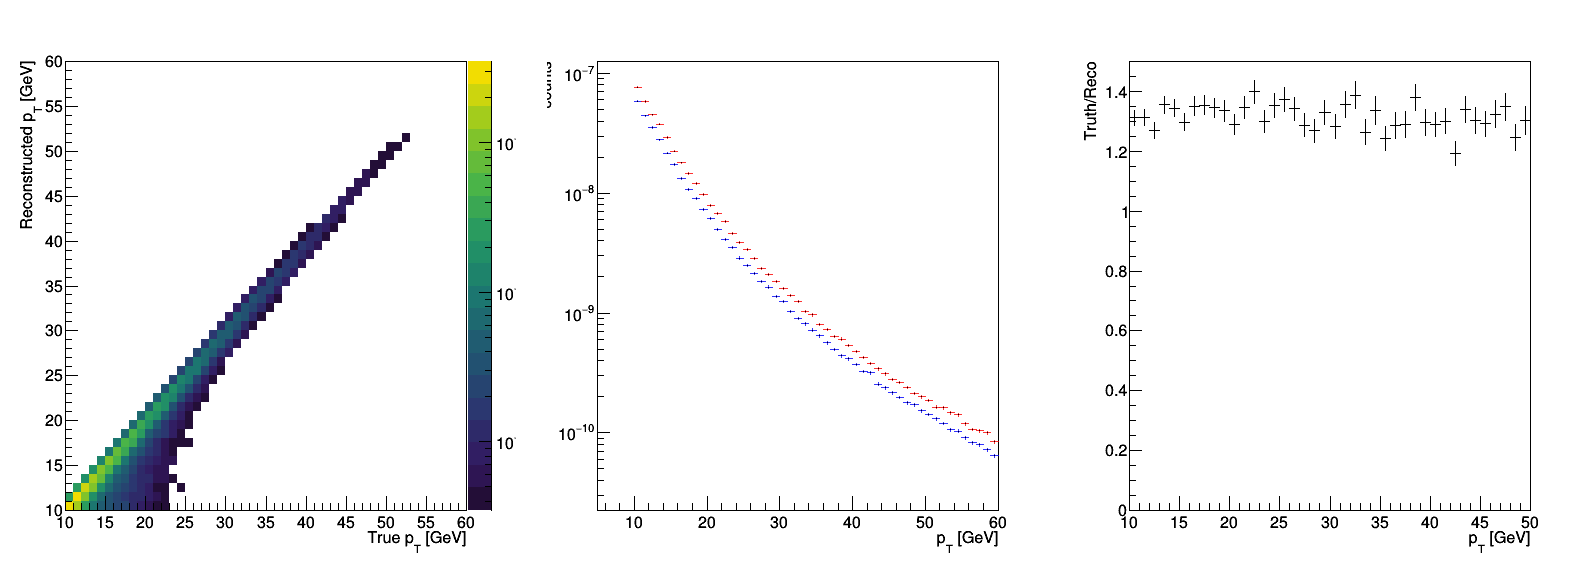

In [24]:
responseMatrix = MCfile.Get("h_Correlation");
#responseMatrix.Rebin2D(2,2)
#responseMatrix.ClearUnderflowAndOverflow()
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()
for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

ratio_mc = mc_truth.Clone()
ratio_mc.SetLineColor(1)
ratio_mc.Divide(mc_reco)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.GetXaxis().SetRangeUser(10,60)
responseMatrix.GetYaxis().SetRangeUser(10,60)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()
c.cd(2)

#label = Legend("")
#label.Add(mc_reco,'MC Reco','L')
#label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
mc_truth.GetXaxis().SetRangeUser(10,60)
mc_reco.GetXaxis().SetRangeUser(10,60)
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
hs_mc.SetTitle('; p_{T} [GeV]; counts')

#label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc.GetXaxis().SetRangeUser(10,50)
ratio_mc.GetYaxis().SetRangeUser(0,1.5)
ratio_mc.Draw('L')
ratio_mc.SetTitle(' ; p_{T} [GeV]; Truth/Reco')
c.Draw()
#c.SaveAs('Matrix_photon_pPb.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


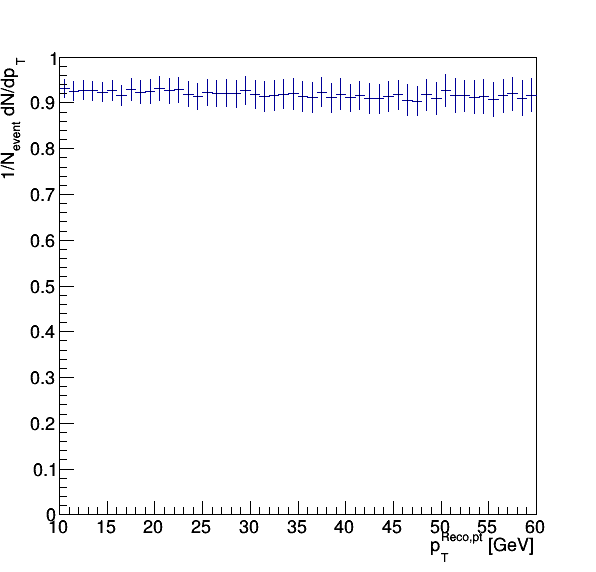

In [25]:
hYesISO = MCfile.Get('h_YesISO')
hNoISO = MCfile.Get('h_NoISO')
isoEff = hYesISO.Clone()
isoEff.Divide(hNoISO)
isoEff.GetYaxis().SetRangeUser(0,1)
isoEff.GetXaxis().SetRangeUser(10,60)
#isoEff.Fit('pol0')
c = ROOT.TCanvas('c','c',600,600)
isoEff.Draw()
c.Draw()
#c.SaveAs('isoEff.pdf')

### Get and plot efficiency and fake rate

4.0 	 4.5 	 5.0 	 0.7966017131150798 	 0.00989184577227855 	 0.012417555234217203
5.0 	 5.5 	 6.0 	 0.8602362940110182 	 0.00984427294208594 	 0.0114436847301398
6.0 	 6.5 	 7.0 	 0.8837564622807688 	 0.009928080124499654 	 0.011233954769482083
7.0 	 7.5 	 8.0 	 0.9028256550797528 	 0.01133283118256648 	 0.01255262421797858
8.0 	 8.5 	 9.0 	 0.9123722780272958 	 0.013344748756400186 	 0.014626429449669168
9.0 	 9.5 	 10.0 	 0.929460489612172 	 0.0157042113952617 	 0.01689605052691854
10.0 	 10.5 	 11.0 	 0.9386633509547104 	 0.01721442841361563 	 0.01833929959671581
11.0 	 11.5 	 12.0 	 0.9421938146739391 	 0.01801998620677119 	 0.0191255619874848
12.0 	 12.5 	 13.0 	 0.9464080182619896 	 0.018269595356522905 	 0.019304142615014723
13.0 	 13.5 	 14.0 	 0.9526306433443991 	 0.018376837087055082 	 0.01929062141286947
14.0 	 14.5 	 15.0 	 0.9507908613379142 	 0.018879035986302813 	 0.01985613950867912
15.0 	 15.5 	 16.0 	 0.9515839514760088 	 0.019094393453606476 	 0.020065905298202038
16

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


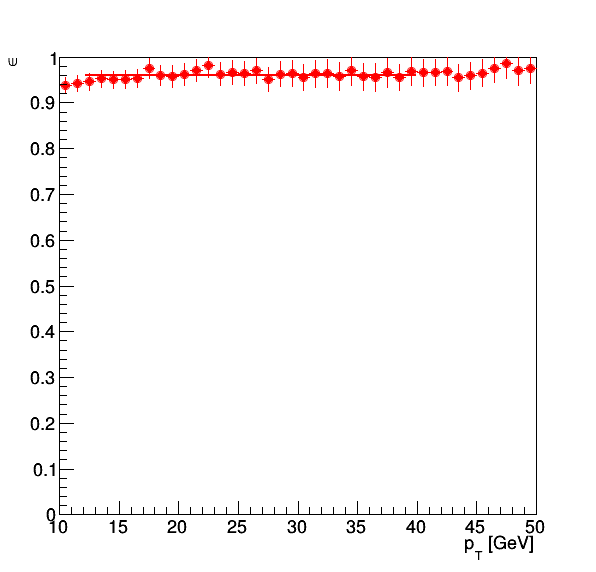

In [26]:
#Get efficiency and fake rate
#efficiency = MCfile.Get("Efficiency");
efficiency = MCfile.Get("hRecoTruth").Clone()
efficiency.Divide(MCfile.Get("hTruth"))
#fakerate   = MCfile.Get("h_Fake");

#Plot efficiency and fake rate
efficiency.SetTitle('; p_{T} [GeV];#epsilon')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.0)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(10,50)
#fakerate.SetMarkerStyle(20)
#fakerate.SetLineColor(4)
#fakerate.SetMarkerColor(4)

for i in range(efficiency.GetNbinsX()):
    low = efficiency.GetBinLowEdge(i)
    center =   efficiency.GetBinCenter(i)
    high = efficiency.GetBinLowEdge(i+1)
    content =  efficiency.GetBinContent(i)
    error =  efficiency.GetBinError(i)
    print (low, '\t', center, '\t', high, '\t', content, '\t', error, '\t', error/content)
    #sum += (error/content)**2


c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 12,40)
efficiency.Draw()
#fakerate.Draw('same')


#label = Legend("")
#label.Add(efficiency,'Efficiency','L')
#label.Add(fakerate,'Fake rate','L')
#label.Draw(.25,.95)
c.Draw()
#c.SaveAs('Efficiency_photon_pPb.pdf')

### Get measured track pt spectrum

In [8]:
data = Datafile.Get('hReco')
data.SetTitle(";p_{T}^{reco}[GeV];counts")
data.ClearUnderflowAndOverflow()

c.Clear()
data.Draw("E")
ROOT.gPad.SetLogy()
c.Draw()

AttributeError: 'TObject' object has no attribute 'SetTitle'

# EMCAL/DCAL comparison

In [4]:
photonSpectrum_pp_emcal = pp_Datafile.Get('hReco_emcal')
photonSpectrum_pp_dcal = pp_Datafile.Get('hReco_dcal')

photonSpectrum_pp_emcal.SetMarkerStyle(20)
photonSpectrum_pp_emcal.SetMarkerColor(ROOT.kOrange+1)
photonSpectrum_pp_emcal.SetLineColor(ROOT.kOrange+1)
photonSpectrum_pp_dcal.SetMarkerStyle(20)
photonSpectrum_pp_dcal.SetMarkerColor(ROOT.kRed-1)
photonSpectrum_pp_dcal.SetLineColor(ROOT.kRed-1)

detector_ratio_pp = photonSpectrum_pp_emcal.Clone()
detector_ratio_pp.Divide(photonSpectrum_pp_dcal)
detector_ratio_pp.SetTitle(';p_{T} [GeV/c];')


****************************************
Minimizer is Linear
Chi2                      =      5.69083
NDf                       =            8
p0                        =      1.00252   +/-   0.0199343   


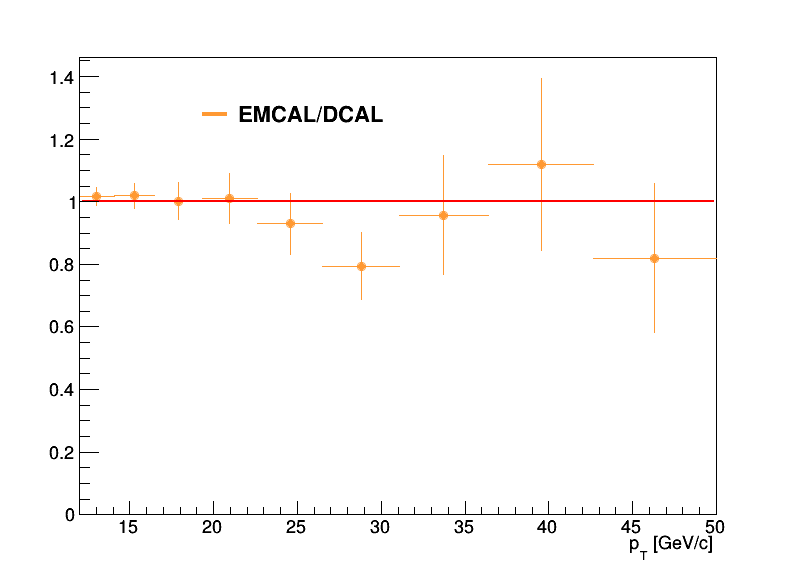

In [5]:
c = ROOT.TCanvas('c','c',800,600)

detector_ratio_pp.GetXaxis().SetRangeUser(12,50)
detector_ratio_pp.SetMinimum(0.0)
detector_ratio_pp.Fit('pol0')
detector_ratio_pp.Draw()
#ratio_unity.Draw('histsame')

label = Legend("")
label.Add(detector_ratio_pp,'EMCAL/DCAL','L')
label.Draw(.25,.85)

c.Draw()
#c.SaveAs('DCalEMCalRatio_pp_log9bin.png')
#c.SaveAs('DCalEMCalRatio_pp.pdf')

# Trigger Efficiency

In [ ]:
Trigfile =  ROOT.TFile('/home/dhruv/13def_4L_16_10GeV30GeV_yesnoISO.root')

### Luminosity Calculation

In [3]:
Rtrig1 = 5800
Rtrig1_err = 648
Rtrig2 = 1477
Rtrig2_err = 100

#NevEG1 = Datafile.Get("hNormalzier").GetBinContent(5)
#NevEG2 = Datafile.Get("hNormalzier").GetBinContent(6)

sigma_MB_pPb = 2.09
sigma_MB_pPB_err = 0.07
sigma_MB_Pbp = 2.12
sigma_MB_Pbp_err = 0.07

#sigma_MB = [(Nev_pPb *sigma_MB_pPb) + ]/(Nev_pPb + Nev_Pbp)
#sigma_MB = 2.11
#sigma_MB



In [5]:
mcFile_13f = ROOT.TFile('/home/dhruv/fout_16_14bins_13f_cluster_emcalTrigOnly_100Kevents_eventCounts_wTrigPileUpEGCut_norm.root')
mcFile_13f_noSkim = ROOT.TFile('/home/dhruv/fout_16_14bins_13f_3runs_noSkim_cluster_emcalTrigOnly_100Kevents_eventCounts_wTrigPileUpEGCut_norm.root')
mcFile_13f_skimmed = ROOT.TFile('/home/dhruv/fout_16_14bins_Skimmed_13f_ptmin12.0_Nevent_695315_cluster_emcalTrigOnly_100Kevents_eventCounts_wTrigPileUpEGCut_norm.root')

In [6]:
hReco_13f = mcFile_13f.Get('hCluster_pt')
hReco_13f_noSkim = mcFile_13f_noSkim.Get('hCluster_pt')
hReco_13f_skimmed = mcFile_13f_skimmed.Get('hCluster_pt')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file cluster_spectra_diffNtuples.png has been created


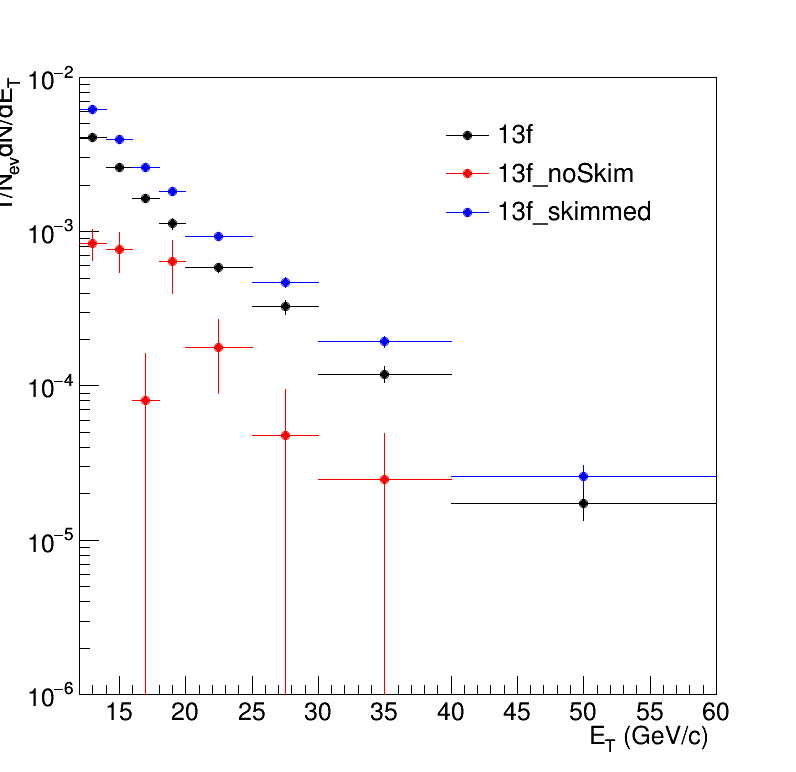

In [21]:
hReco_13f.GetXaxis().SetRangeUser(12, 60)
hReco_13f.GetYaxis().SetRangeUser(1e-6, 1e-2)

hReco_13f.SetLineColor(ROOT.kBlack)
hReco_13f_noSkim.SetLineColor(ROOT.kRed)
hReco_13f_skimmed.SetLineColor(ROOT.kBlue)

hReco_13f.SetMarkerColor(ROOT.kBlack)
hReco_13f_noSkim.SetMarkerColor(ROOT.kRed)
hReco_13f_skimmed.SetMarkerColor(ROOT.kBlue)

hReco_13f.SetMarkerStyle(20)
hReco_13f_noSkim.SetMarkerStyle(20)
hReco_13f_skimmed.SetMarkerStyle(20)

legend = ROOT.TLegend(0.55, 0.7, 0.85, 0.85)
legend.SetBorderSize(0)
legend.SetFillStyle(0)


legend.AddEntry(hReco_13f, '13f')
legend.AddEntry(hReco_13f_noSkim, '13f_noSkim')
legend.AddEntry(hReco_13f_skimmed, '13f_skimmed')
    
c = ROOT.TCanvas('c','c',800,800)
c.SetLogy()

hReco_13f.Draw("e")
hReco_13f_noSkim.Draw("esame")
hReco_13f_skimmed.Draw("esame")
legend.Draw("same")

c.Draw()
c.SaveAs('cluster_spectra_diffNtuples.png')